# Assigment 6

## Upload your code (.ipynb) on Learn dropbox and submit pdfs of the code and the mathematical questions to Crowdmark.

## -----------------------------------------------------------------------------------------------------------

## Rank-Sparsity 

## Question 1

Implement ADMM for the problem of separating a background image from foreground interference. Download the datasets at: http://www.svcl.ucsd.edu/projects/background_subtraction/JPEGS.tar.gz 

You will have to solve this problem:

$$
\begin{align*}
\mbox{minimize} & \ \|L\|_* + \gamma \|M\|_1 \\
\mbox{subj. to:} & \ L+M=A
\end{align*}
$$

where $\gamma>0$ is a parameter that you will have to tune. 

Use only the first dataset, birds, which contains 71 jpeg images each with 37752 gray-scale pixels. Form a matrix A of size 37752 x 71 with these images. 

When you are done, print the background image (that is, columns of the component L) for frames 1, 11, ..., 71. 

Note that this algorithm requires SVD. Computing the SVD in the usual way is very expensive for this dataset because the U matrix in SVD has size 37752 × 37752. You will have to utilize the "economy" SVD in https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.svd.html
or 
https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.svd.html
by setting the option full_matrices = False.

Marks: 33.

In [5]:
import os, sys, scipy
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg
from numpy.linalg import norm
import cv2

(156, 242)


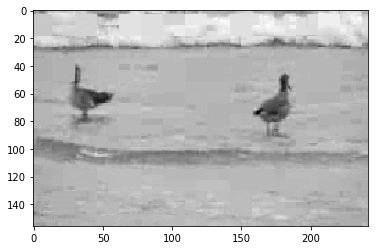

In [6]:

img = cv2.imread('./JPEGS/birds/frame_1.jpg', cv2.IMREAD_GRAYSCALE)
row,col = img.shape[0],img.shape[1]
print(row, col)

A = np.zeros([37752,71])
for i in range(71):
    file_path = 'JPEGS/birds/frame_' + str(i+1) +'.jpg'
    img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
    img = np.reshape(img,(37752))
    A[:,i] = img
plt.imshow(A[:,0].reshape((row,col)), cmap = 'gray')

In [7]:
def proximal_L(x, p):
    U, s, Vh = linalg.svd(x,full_matrices=False)
    threshold = 1/p
    prox = np.where(s >=threshold, s - threshold, 0)
    ans = scipy.linalg.diagsvd(prox,len(prox),len(prox))
    ans = (U.dot(ans)).dot(Vh)
    return ans

def proximal_M(u,gamma,p):
    threshold = gamma/p
    ans = np.where(u>=threshold, u - threshold, u)
    ans = np.where(np.absolute(u)<=threshold, 0, ans)
    ans = np.where(u<=-threshold, u + threshold, ans)
    return ans

def admm(A, p, max_iteration, gamma):
    M = np.random.rand(A.shape[0],A.shape[1])
    Y = np.zeros(A.shape)
    count = 0
    while count < max_iteration:
        x = -M + A - Y/p
        L = proximal_L(x,p)
        u = -L + A - Y/p
        M = proximal_M(u,gamma,p)
        Y = Y + p*(L + M - A)
        count +=1
        e = norm(L+M-A,2)
        if e < epsilon:
            print(count)
            break
    return L, M

1


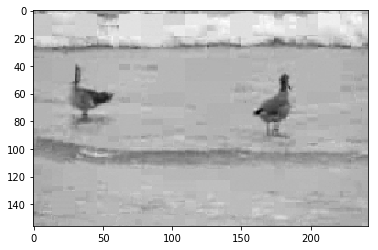

In [87]:
max_iteration = 30000
p = 1
gamma = 1/500
epsilon = 1e-20
result,m1 = admm(A,p,10,gamma)
# for i in range(0,80,10):
#     print('i = {:10d}'.format(i))
#     plt.imshow(result[:,i].reshape((row,col)), cmap = 'gray')
plt.imshow(result[:,0].reshape((row,col)), cmap = 'gray')

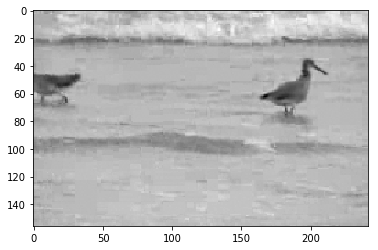

In [88]:
plt.imshow(result[:,10].reshape((row,col)), cmap = 'gray')

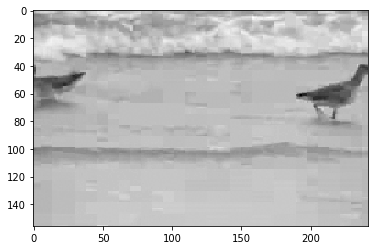

In [89]:
plt.imshow(result[:,20].reshape((row,col)), cmap = 'gray')

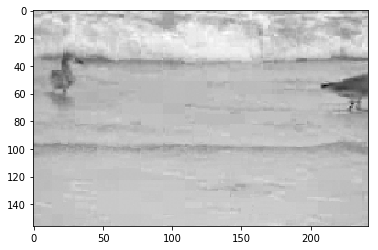

In [90]:
plt.imshow(result[:,30].reshape((row,col)), cmap = 'gray')

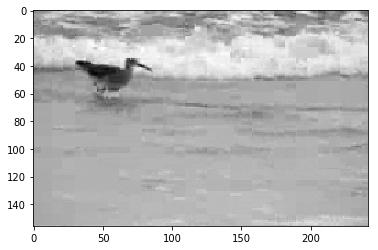

In [91]:
plt.imshow(result[:,40].reshape((row,col)), cmap = 'gray')

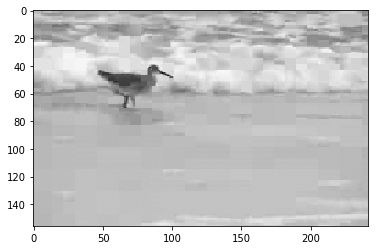

In [92]:
plt.imshow(result[:,50].reshape((row,col)), cmap = 'gray')

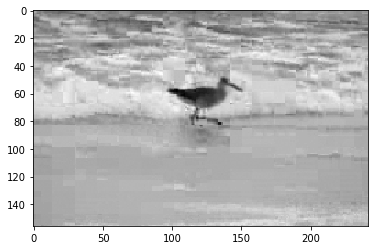

In [93]:
plt.imshow(result[:,60].reshape((row,col)), cmap = 'gray')

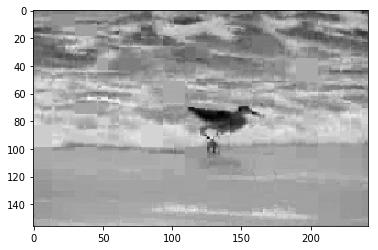

In [94]:
plt.imshow(result[:,70].reshape((row,col)), cmap = 'gray')

## Robust Linear Regression

## Question 2

Implement AM-RR (alternating minimization for robust regresion) on the same dataset as Q1. Form a matrix X whose columns are the first 70 bird images. Form a vector y that is the 71st image. Then try to fit $$y\approx Xw $$ using the Robust Linear Regression problem. 

Illustrate the following two plots. The first plot should show the image that was not covered by set S (S is an output of AM-RR). In other words, y(S^c), where S^c is the complement of S with respect to the set of all pixels. Pixels in S should be set to white (255, when the grey scale image is from 0 to 255) in this image. 

The second plot should show the image indexed by S, in other words, X(S,:)w. Fill in the entries not indexed by S 
to white. 

Marks: 33.

In [95]:
X = A[:,:70]
Y = A[:,70]

In [96]:
def get_L(x):
    return norm(x,2)**2

def amrr(x,y,k,max_iteration,epsilon):
    n = y.shape[0]
    s = [i for i in range(n-k)]
    s = np.array(s)
    w = np.zeros(70)
    count = 0
    while count < max_iteration:
        x_ = x[s]
        y_ = y[s]
        step_size = 1/get_L(x_)
        w = w - step_size* np.sum(np.multiply(x_.dot(w) - y_,x_.T),axis = 1)
        u = np.square(y-x.dot(w))
        s = np.argsort(u,axis  =0)[:n-k]
        e = norm(y - X.dot(w),2)
        count +=1
        print('iteration = {:10d} \t error = {:10f}'.format(count,e))
        if e < epsilon:
            print('End')
            break
        
    return w,s

In [97]:
print(get_L(X))

67790133973.21922


In [99]:
k = 700
epsilon = 1e-3
w,index = amrr(X,Y,k,100,epsilon)

iteration =          1 	 error = 3397.211293
iteration =          2 	 error = 3399.801936
iteration =          3 	 error = 3399.444745
iteration =          4 	 error = 3398.652410
iteration =          5 	 error = 3397.820530
iteration =          6 	 error = 3396.990308
iteration =          7 	 error = 3396.161741
iteration =          8 	 error = 3395.354679
iteration =          9 	 error = 3394.528897
iteration =         10 	 error = 3393.704761
iteration =         11 	 error = 3392.882268
iteration =         12 	 error = 3392.061414
iteration =         13 	 error = 3391.241639
iteration =         14 	 error = 3390.423727
iteration =         15 	 error = 3389.607446
iteration =         16 	 error = 3388.792791
iteration =         17 	 error = 3387.999935
iteration =         18 	 error = 3387.188154
iteration =         19 	 error = 3386.377992
iteration =         20 	 error = 3385.569444
iteration =         21 	 error = 3384.762642
iteration =         22 	 error = 3383.977314
iteration 

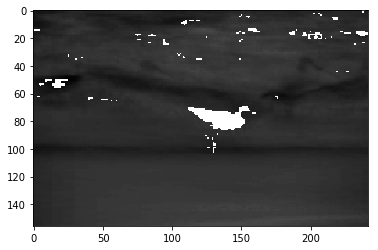

In [100]:
y_result = X[index].dot(w)
image_q2 = np.full(Y.shape,255)
image_q2[index] = y_result
plt.imshow(image_q2.reshape((row,col)), cmap = 'gray')

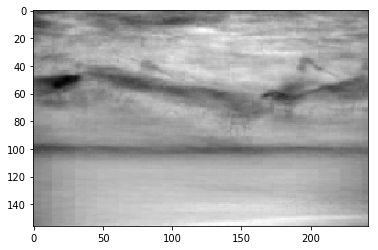

In [101]:
plt.imshow(X.dot(w).reshape((row,col)), cmap = 'gray')

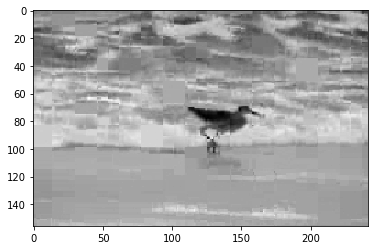

In [102]:
plt.imshow(A[:,70].reshape((row,col)), cmap = 'gray')

## Nonnegative matrix factorization

Consider the nonnegative matrix factorization problem. For this problem, we showed that the modified multiplicative updates algorithm satisfies the nonnegativity constraints at each iteration. Consider now the nonnegative sparse coding problem:
$$
\begin{align*}
\mbox{minimize}_{W,H} &  \ F(W,H):= \frac{1}{2}\| WH-X\|_F^2 + \lambda \|H\|_1\\
\mbox{subj. to} & \ W_{ij}\ge 0 \ \forall i,j \\
                &  \ H_{ij}\ge 0 \ \forall i,j,
\end{align*}
$$
where 
$$
\|H\|_1 = \sum_{i,j} |H_{ij}|.
$$
and $\lambda \ge 0$ is a parameter that controls the effect of the l1-norm. This problem is called sparse coding because the l1-norm forces a lot of weights in matrix $H$ to become zero.

## Question 3

Show that the modified multiplicative updates algorithm for the above nonnegative sparse coding problem also satisfies the nonnegative constraints at each iteration. 

Marks: 5

## Question 4

Use the face dataset, see Assigment 5. Set parameter $r=6$ in the nonnegative factorization problem. Plot $\frac{1}{2}\| WH-X\|_F^2$ as $\lambda$ increases.

Marks: 12

## Question 5

Choose a $\lambda$ and extract the features matrix $W$ by solving the nonnegative matrix factorization problem. Report the 6 features of the faces dataset, i.e., the 6 columns of matrix $W$. You can report the features by visualizing them in a similar way to the above example.

Marks: 12

## Question 5

For your chosen $\lambda$, which are the most important features of the first 6 faces? Provide the code on how to obtain the most important features.

Marks: 5

In [81]:
# from numpy.random import RandomState
# from sklearn.datasets import fetch_olivetti_faces
# import matplotlib.pyplot as plt

In [82]:
# n_row, n_col = 2, 3
# image_shape = (64, 64)
# rng = RandomState(0)

Dataset consists of 400 faces


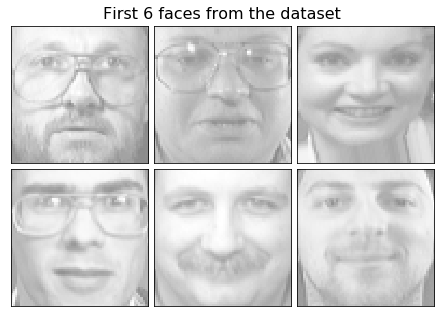

In [83]:
##########################################################################
# From assignment 5
##########################################################################
# This piece of code is for loading data and visualizing 
# the first 6 images in the dataset.

# Useful packages for loading the data and plotting
from numpy.random import RandomState
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces

n_row, n_col = 2, 3
image_shape = (64, 64)
rng = RandomState(0)

# Useful function for plotting
def plot_gallery(title, images, n_col=n_col, n_row=n_row, cmap=plt.cm.gray):
    plt.figure(figsize=(2. * n_col, 2.26 * n_row))
    plt.suptitle(title, size=16)
    for i, comp in enumerate(images):
        plt.subplot(n_row, n_col, i + 1)
        vmax = max(comp.max(), -comp.min())
        plt.imshow(comp.reshape(image_shape), cmap=cmap,
                   interpolation='nearest',
                   vmin=-vmax, vmax=vmax)
        plt.xticks(())
        plt.yticks(())
    plt.subplots_adjust(0.01, 0.05, 0.99, 0.93, 0.04, 0.)

# Load faces data
dataset = fetch_olivetti_faces(shuffle=True, random_state=rng)

# Store the vectorized images. Each image has dimensions 64 x 64.
faces = dataset.data

n_samples = faces.shape[0]
print("Dataset consists of %d faces" % n_samples)
    
plot_gallery("First 6 faces from the dataset", faces[:6])    

In [84]:
# def proximal_L1 (u, a):
#     ans = np.where(u >= a, u-a, 0)
#     ans = np.where(u <= -a, u+a, ans)
#     return ans

# def get_grad_H(W, H, X):
#     return W.T.dot(W.dot(H) - X)

# def get_grad_W(W, H, X):
#     return (W.dot(H) - X).dot(H.T)

# def get_obj_HW(W, H, X):
#     obj = W.dot(H) - X
#     return (1/2)*np.trace(obj.dot(obj.T))

# def get_WH_bar(WH, sigma, gradient_WH):
#     max_WH = np.where(WH > sigma, WH, sigma)
#     WH = np.where(gradient_WH >= 0, WH, max_WH)
#     return WH

# def face_extract(x, sigma, yita, max_iteration, lambda_):
#     W = np.random.random([x.shape[0], 6])
#     S = np.diag(1/(W.sum(axis = 0)))
#     S_inv = np.diag(W.sum(axis = 0))
#     H = np.random.random([6, x.shape[1]])
#     yita_W = yita * np.ones(W.shape)
#     yita_H = yita * np.ones(H.shape)
#     iteration = 0
#     while iteration < max_iteration:
#         gradient_H = get_grad_H(W, H, x)
#         gradient_W = get_grad_W(W, H, x)
        
#         H_bar = get_WH_bar(H, sigma, gradient_H)
#         W_bar = get_WH_bar(W, sigma, gradient_W)
        
#         denominator_H = (W.T.dot(W)).dot(H_bar) + yita_H
#         alpha = np.divide(H_bar, denominator_H)
#         u = H - alpha * gradient_H
#         H_new = proximal_L1(u, alpha * lambda_)
        
#         gradient_W_new = get_grad_W(W, H_new, x)
#         denominator_W = W_bar.dot(H.dot(H.T)) + yita_W
#         W_new = W - np.divide(W_bar, denominator_W)*gradient_W_new
        
#         S = np.diag(1/W_new.sum(axis = 0))
#         S_inv = np.diag(W_new.sum(axis = 0))
        
#         W = W_new.dot(S)
#         H = S_inv.dot(H_new)
        
#         iteration += 1
#     return W,H
# X = faces.T

In [85]:
def prox_L1 (u, a):
    result = np.where(u >= a, u-a, 0)
    result = np.where(u <= -a, u+a, result)
    return result

def grad_H(W, H, X):
    return W.T.dot(W.dot(H) - X)

def grad_W(W, H, X):
    return (W.dot(H) - X).dot(H.T)

def obj_HW(W, H, X):
    obj = W.dot(H) - X
    return (1/2)*np.trace(obj.dot(obj.T))

def WH_bar(WH, sigma, gradient_WH):
    max_WH = np.where(WH > sigma, WH, sigma)
    WH = np.where(gradient_WH >= 0, WH, max_WH)
    return WH

def face_extract(x, sigma, yita, max_iteration, lambda_):
    W = np.random.random([x.shape[0], 6])
    S = np.diag(1/(W.sum(axis = 0)))
    S_inv = np.diag(W.sum(axis = 0))
    H = np.random.random([6, x.shape[1]])
    yita_W = yita * np.ones(W.shape)
    yita_H = yita * np.ones(H.shape)
    iteration = 0
    while iteration < max_iteration:
        gradient_H = grad_H(W, H, x)
        gradient_W = grad_W(W, H, x)
        
        H_bar = WH_bar(H, sigma, gradient_H)
        W_bar = WH_bar(W, sigma, gradient_W)
        
        denominator_H = (W.T.dot(W)).dot(H_bar) + yita_H
        alpha = np.divide(H_bar, denominator_H)
        u = H - alpha * gradient_H
        H_new = prox_L1(u, alpha * lambda_)
        
        gradient_W_new = grad_W(W, H_new, x)
        denominator_W = W_bar.dot(H.dot(H.T)) + yita_W
        W_new = W - np.divide(W_bar, denominator_W)*gradient_W_new
        
        S = np.diag(1/W_new.sum(axis = 0))
        S_inv = np.diag(W_new.sum(axis = 0))
        
        W = W_new.dot(S)
        H = S_inv.dot(H_new)
        
        iteration += 1
    return W,H


In [86]:
f_array = []
for l in np.linspace(0.01, 0.12, 12):
    
    W,H = face_extract(X, 0.5, 0.5, 100,l)
    f = obj_HW(W, H, X)
    f_array.append(f)
    print('l = {:10f}\t f = {:10f}'.format(l,f))
print(f_array)

l =   0.010000	 f =   0.000000
l =   0.020000	 f =   0.000000
l =   0.030000	 f =   0.000000
l =   0.040000	 f =   0.000000
l =   0.050000	 f =   0.000000
l =   0.060000	 f =   0.000000
l =   0.070000	 f =   0.000000
l =   0.080000	 f =   0.000000
l =   0.090000	 f =   0.000000
l =   0.100000	 f =   0.000000
l =   0.110000	 f =   0.000000
l =   0.120000	 f =   0.000000
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


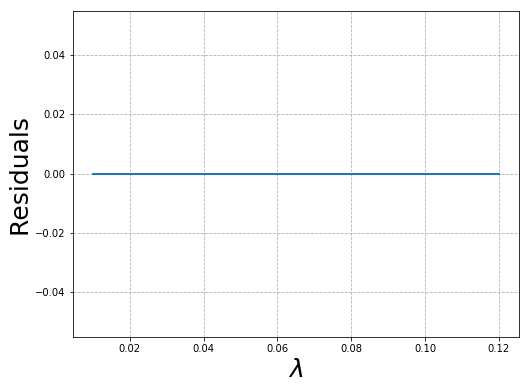

In [79]:
fig = plt.figure(figsize=(8, 6))
plt.plot(np.linspace(0.01, 0.12, 12), f_array,linewidth=2.0)
# plt.legend(prop={'size': 20},loc="lower left")
plt.xlabel("$\lambda$", fontsize=25)
plt.ylabel("Residuals", fontsize=25)
plt.grid(linestyle='dashed')
plt.show()

In [ ]:
print(f_array)

In [66]:
k = [1,2,3,4,5]

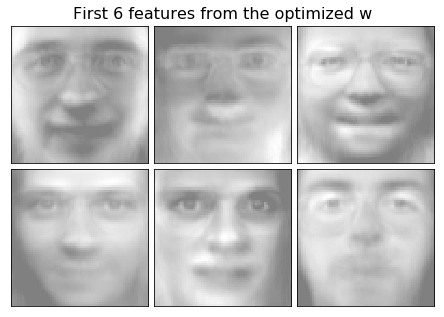

In [67]:
iterations = 500
w_opt_best, h_opt_best = face_extract(X, 0.5, 0.5, 500, 0.02)
plot_gallery("First 6 features from the optimized w", w_opt_best.T[:6])

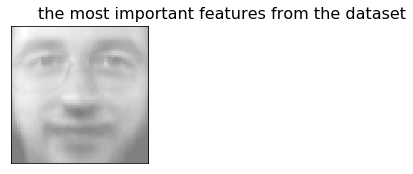

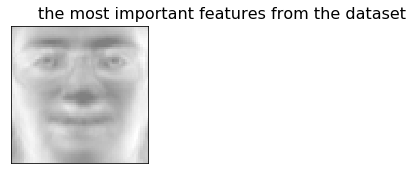

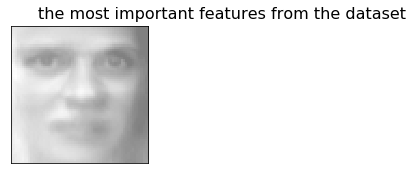

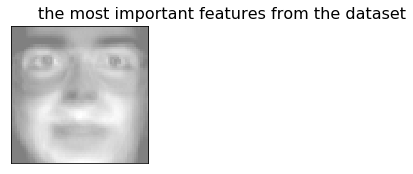

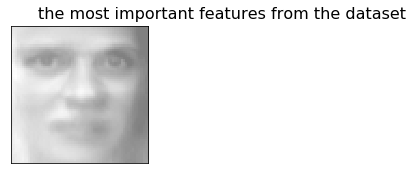

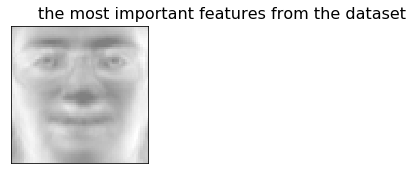

In [53]:
for i in range(6):
    h_six = h_opt_best[:,i]
    # h_sum = np.sum(h_six,axis=1)
    sorted_h_index = np.argsort(h_six,axis  =0)[::-1]
    plot_gallery("the most important features from the dataset", w_opt_best.T[sorted_h_index[:1]]) 


In [80]:
print(X)

[[0.6694215  0.76859504 0.37190083 ... 0.55785125 0.5206612  0.3966942 ]
 [0.6363636  0.75619835 0.34710744 ... 0.60330576 0.5206612  0.3677686 ]
 [0.6487603  0.74380165 0.3677686  ... 0.6570248  0.53305787 0.3429752 ]
 ...
 [0.08677686 0.48347107 0.7066116  ... 0.17768595 0.46694216 0.37190083]
 [0.08264463 0.6280992  0.6818182  ... 0.20661157 0.43801653 0.26859504]
 [0.07438017 0.6528926  0.5495868  ... 0.19421488 0.43801653 0.29752067]]
